In [1]:
import pandas as pd
from data.mind.raw import *

In [2]:
df = pd.concat([DF_NEWS_TEST, DF_NEWS_TRAIN])
df

,cat,subcat,title,abstract,url,title_ent,abstract_ent
N3112,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://www.msn.com/en-us/lifestyle/lifestyler...,"[{'Label': 'Prince Philip, Duke of Edinburgh',...",[]
N10399,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://www.msn.com/en-us/news/world/the-cost-...,[],"[{'Label': 'Ukraine', 'Type': 'G', 'WikidataId..."
N12103,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://www.msn.com/en-us/health/voices/i-was-...,[],"[{'Label': 'National Basketball Association', ..."
N20460,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://www.msn.com/en-us/health/medical/how-t...,"[{'Label': 'Skin tag', 'Type': 'C', 'WikidataI...","[{'Label': 'Skin tag', 'Type': 'C', 'WikidataI..."
N5409,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,https://www.msn.com/en-us/weather/weathertopst...,"[{'Label': 'Orlando, Florida', 'Type': 'G', 'W...","[{'Label': 'Orlando, Florida', 'Type': 'G', 'W..."
...,...,...,...,...,...,...,...
N4833,news,newsscienceandtechnology,Realme takes chunk of India mobile market as S...,Over 400 percent more phones shipped year-on-year,https://www.msn.com/en-us/news/newsscienceandt...,"[{'Label': 'Realme', 'Type': 'N', 'WikidataId'...",[]
N22331,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...,https://www.msn.com/en-us/sports/golf/young-no...,"[{'Label': 'First Coast', 'Type': 'G', 'Wikida...",[{'Label': 'United States women's national soc...
N21897,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://www.msn.com/en-us/weather/topstories/a...,"[{'Label': 'Woolsey Fire', 'Type': 'N', 'Wikid...","[{'Label': 'Woolsey Fire', 'Type': 'N', 'Wikid..."
N6299,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://www.msn.com/en-us/lifestyle/lifestylef...,"[{'Label': 'Broadway theatre', 'Type': 'F', 'W...",[]


In [3]:
cats = df['cat'].dropna().unique()
cats

array(['lifestyle', 'news', 'health', 'weather', 'entertainment', 'autos',
       'travel', 'sports', 'tv', 'foodanddrink', 'movies', 'finance',
       'video', 'music', 'middleeast', 'kids', 'northamerica'],
      dtype=object)

In [5]:
cat2nb_articles = {}
for cat in cats:
    cat2nb_articles[cat] = df[df['cat'] == cat].shape[0]
cat2nb_articles

{'lifestyle': 2671,
 'news': 14420,
 'health': 2151,
 'weather': 1439,
 'entertainment': 737,
 'autos': 1617,
 'travel': 2020,
 'sports': 10263,
 'tv': 1255,
 'foodanddrink': 2612,
 'movies': 771,
 'finance': 3093,
 'video': 1524,
 'music': 873,
 'middleeast': 4,
 'kids': 12,
 'northamerica': 1}

In [16]:
cat2subcats = {}
for cat in cats:
    cat2subcats[cat] = df[df['cat'] == cat]['subcat'].unique()
cat2subcats

{'lifestyle': array(['lifestyleroyals', 'lifestylebuzz', 'shop-apparel',
        'lifestyledidyouknow', 'lifestylesmartliving', 'voices',
        'lifestylehomeandgarden', 'shop-all', 'causes', 'lifestyledecor',
        'lifestylecelebstyle', 'shop-holidays', 'causes-green-living',
        'lifestylehoroscope', 'advice', 'lifestyleparenting',
        'lifestylecareer', 'lifestylediy', 'lifestylepetsanimals',
        'lifestylefamilyandrelationships',
        'lifestylecleaningandorganizing', 'lifestylebeauty',
        'lifestyleweddings', 'lifestylelovesex', 'holidays',
        'lifestylevideo', 'lifestylefamily', 'lifestylefashion',
        'causes-animals', 'lifestyle-wedding', 'pregnancyparenting',
        'lifestylemindandsoul', 'lifestyle-news-feature',
        'lifestylerelationships', 'lifestylepets', 'awardstyle',
        'lifestyleshoppinghomegarden', 'travel', 'lifestylehoroscopefish',
        'lifestylewhatshot', 'shop-books-movies-tv'], dtype=object),
 'news': array(['newsw

In [17]:
cat2nb_subcats = { cat: len(subcats) for cat, subcats in cat2subcats.items() }
cat2nb_subcats

{'lifestyle': 41,
 'news': 30,
 'health': 19,
 'weather': 2,
 'entertainment': 12,
 'autos': 24,
 'travel': 13,
 'sports': 25,
 'tv': 10,
 'foodanddrink': 15,
 'movies': 7,
 'finance': 30,
 'video': 13,
 'music': 10,
 'middleeast': 1,
 'kids': 5,
 'northamerica': 1}

In [5]:
(DF_NEWS_TEST['subcat'] + DF_NEWS_TRAIN['subcat']).unique()

array(['football_nflfootball_nfl', nan, 'newsworldnewsworld',
       'personalfinancepersonalfinance', 'newsgoodnewsnewsgoodnews',
       'lifestylebeautylifestylebeauty', 'newsopinionnewsopinion',
       'foodnewsfoodnews', 'newspoliticsnewspolitics',
       'baseball_mlbbaseball_mlb', 'football_ncaafootball_ncaa',
       'popculturepopculture', 'recipesrecipes',
       'traveltripideastraveltripideas', 'tv-celebritytv-celebrity',
       'finance-companiesfinance-companies',
       'entertainment-celebrityentertainment-celebrity',
       'weathertopstoriesweathertopstories',
       'finance-real-estatefinance-real-estate', 'newsusnewsus',
       'basketball_nbabasketball_nba', 'newscrimenewscrime',
       'newstrendsnewstrends', 'traveltipstraveltips',
       'finance-videofinance-video',
       'newsscienceandtechnologynewsscienceandtechnology',
       'animalsanimals', 'movievideomovievideo',
       'music-celebritymusic-celebrity', 'basketball_ncaabasketball_ncaa',
       'travelar

In [8]:
DF_NEWS_TEST.iloc[0]['title_ent'][0]

{'Label': 'Prince Philip, Duke of Edinburgh',
 'Type': 'P',
 'WikidataId': 'Q80976',
 'Confidence': 1.0,
 'OccurrenceOffsets': [48],
 'SurfaceForms': ['Prince Philip']}

In [1]:
from models import BLACKBOX_MODEL, RANDOM_MODEL, WHITEBOX_MODEL
from utils.utils import get_viz


Tensor("conv1d/Relu:0", shape=(None, 30, 400), dtype=float32)
Tensor("att_layer2/Sum_1:0", shape=(None, 400), dtype=float32)


c:\users\flo\miniconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
0it [00:00, ?it/s]c:\users\flo\miniconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
586it [00:07, 76.65it/s] 
C:\Users\Flo\Desktop\Cours\ETH\2 - Spring 2022\IML - Interactive ML\Project\LayPeople-xai-iml22\back\models\blackbox\model.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.load()


In [2]:
history = [ 'N20460', 'N3112', 'N10' ]
wei_mtd = { 'content': .1, 'popularity': .4, 'users': .5 }
wei_obj = { 'surprise': .2, 'exploration': .4, 'diversity': .4 }

In [3]:
model = BLACKBOX_MODEL
user_emb = model.embed_user(history)
print(user_emb)
recos = model.get_reco(user_emb, history=history, wei_mtd=wei_mtd, wei_obj=wei_obj)
display(recos)
viz = get_viz(user_emb, 'users', 'blackbox')
viz

c:\users\flo\miniconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[ 0.01800648  0.13042238  0.09434672  0.16754577  0.36329594  0.10177313
  0.04532591  0.03534091 -0.02591864  0.02734415 -0.01343771 -0.01045099
 -0.02514569  0.10732698  0.10284062 -0.07606783  0.18505913 -0.01785135
 -0.16242664  0.01959695  0.03389576 -0.08618254 -0.15211597 -0.03452446
  0.16406488  0.10935248  0.16934906  0.09753264  0.03277744  0.16780049
 -0.11206964 -0.00922259  0.03034202 -0.08802561  0.10841005  0.2532268
 -0.07896544  0.08632652  0.27327883  0.04609491 -0.0564989   0.01484462
  0.07242411  0.1286573  -0.10463253  0.04831835 -0.2007829  -0.01672215
  0.05118226 -0.0081432   0.28550717  0.2904613  -0.15470119 -0.0632293
  0.15166263  0.22538565 -0.20587459 -0.10300189  0.4715142  -0.07594593
  0.08289841  0.04297961  0.16789418  0.11950274 -0.02230952  0.03125356
  0.07014722  0.20380522  0.15911464  0.04021841  0.07405299  0.23856616
 -0.09576714  0.03676993  0.02265895  0.05405087  0.06859245  0.05262155
 -0.1614765   0.03149195 -0.26007664 -0.07167032 -0.1

,cat,subcat,title,abstract,url,title_ent,abstract_ent
N18892,music,music-celebrity,"Wynonna Judd's Daughter, 23, Released from Pri...",Wynonna Judd's Daughter Released from Prison 6...,https://www.msn.com/en-us/music/music-celebrit...,[],[]
N15396,sports,baseball_mlb,Reddick: Yankees fans 'disrespectful' for thro...,NEW YORK (AP) Houston Astros right fielder J...,https://www.msn.com/en-us/sports/mlb/reddick-y...,"[{'Label': 'Josh Reddick', 'Type': 'P', 'Wikid...","[{'Label': 'Josh Reddick', 'Type': 'P', 'Wikid..."
N23978,sports,baseball_mlb,MLB rumors: Yankees interview David Cone for p...,The New York Yankees interviewed David Cone fo...,https://www.msn.com/en-us/sports/mlb/mlb-rumor...,"[{'Label': 'David Cone', 'Type': 'P', 'Wikidat...","[{'Label': 'David Cone', 'Type': 'P', 'Wikidat..."
N20507,sports,baseball_mlb,Yankees Reportedly Parting Ways With Longtime ...,While reports swirled last week Joe Girardi mi...,https://www.msn.com/en-us/sports/baseball_mlb/...,"[{'Label': 'New York Yankees', 'Type': 'O', 'W...","[{'Label': 'New York Yankees', 'Type': 'O', 'W..."
N11696,finance,finance-taxes,Here are the new income tax brackets for 2020,The IRS released the federal tax rates and inc...,https://www.msn.com/en-us/finance/finance-taxe...,[],"[{'Label': 'Internal Revenue Service', 'Type':..."
N1883,sports,baseball_mlb,Astros OF Josh Reddick calls New York Yankees ...,Astros right fielder Josh Reddick was critical...,https://www.msn.com/en-us/sports/baseball_mlb/...,"[{'Label': 'Josh Reddick', 'Type': 'P', 'Wikid...","[{'Label': 'Josh Reddick', 'Type': 'P', 'Wikid..."
N6801,sports,football_ncaa,Saban suspended unnamed player for Miss. St. g...,Crimson Tide looking to bounce back from its f...,https://www.msn.com/en-us/sports/football_ncaa...,"[{'Label': 'Nick Saban', 'Type': 'P', 'Wikidat...","[{'Label': 'Alabama Crimson Tide football', 'T..."
N8531,sports,football_nfl,Maurkice Pouncey suspended three games,The NFL has handed out discipline to players i...,https://www.msn.com/en-us/sports/football_nfl/...,"[{'Label': 'Maurkice Pouncey', 'Type': 'P', 'W...","[{'Label': 'Maurkice Pouncey', 'Type': 'P', 'W..."
N24747,sports,baseball_mlb,Fan ejected after taunting Astros starter Greinke,"Well, Yankees fans were warned that they need ...",https://www.msn.com/en-us/sports/baseball_mlb/...,"[{'Label': 'Zack Greinke', 'Type': 'P', 'Wikid...",[]
N14982,sports,football_nfl,"Browns, Steelers brawl at end of Cleveland's 2...",Cleveland defense end Myles Garrett ripped off...,https://www.msn.com/en-us/sports/football_nfl/...,"[{'Label': 'Cleveland Browns', 'Type': 'O', 'W...","[{'Label': 'Cleveland Browns', 'Type': 'O', 'W..."


[-1.1719808593342007, -4.781393062744043]

In [4]:
model = RANDOM_MODEL
user_emb = model.embed_user(history)
print(user_emb)
recos = model.get_reco(user_emb, history=history, wei_mtd=wei_mtd, wei_obj=wei_obj)
display(recos)
viz = get_viz(user_emb, 'users', 'random')
viz

[ 0.49671415 -0.1382643 ]


,cat,subcat,title,abstract,url
N18819,news,newspolitics,Elizabeth Warren Says She Will Release a Plan ...,"INDIANOLA, Iowa Senator Elizabeth Warren of ...",https://www.msn.com/en-us/news/politics/elizab...
N17218,video,news,Russia investigation origins probe shifts to a...,New York Times reports probe shift; reaction f...,https://www.msn.com/en-us/video/news/russia-in...
N1494,foodanddrink,restaurantsandnews,49 Unique Doughnuts You Have to Try,"Forget traditional deluxe, artisanal doughnu...",https://www.msn.com/en-us/foodanddrink/restaur...
N637,sports,football_ncaa,"Bill Plaschke: Mike Bohn brings USC integrity,...",LOS ANGELES_You ever heard of Mike Bohn? Me ne...,https://www.msn.com/en-us/sports/ncaafb/bill-p...
N26752,weather,weathertopstories,Phoenix may raise recycling rates or scrap the...,The Phoenix City Council is debating whether t...,https://www.msn.com/en-us/weather/weathertopst...
N20903,sports,basketball_nba,Shaquille O'Neal donates home to family of Atl...,Shaquille O'Neal heard Isaiah Payton couldn't ...,https://www.msn.com/en-us/sports/basketball_nb...
N12642,lifestyle,lifestyleroyals,47 Photos of Kate Middleton That You Forgot Ex...,Looking back at the Duchess of Cambridge's bes...,https://www.msn.com/en-us/lifestyle/lifestyler...
N11309,news,newsworld,Threat or chance? Israel eyes Lebanon protests...,Looking down on Lebanon from the Israeli-occup...,https://www.msn.com/en-us/news/newsworld/threa...
N24507,sports,football_nfl,Seahawks look for first 4-0 road start since 1980,NaN,https://www.msn.com/en-us/sports/football_nfl/...
N10545,news,newscrime,3 Killed After Police Pursuit Ends In Crash On...,A fourth person was rushed to a hospital in cr...,https://www.msn.com/en-us/news/newscrime/3-kil...


[0.4455808796861795, 0.252702135970178]

In [3]:
model = WHITEBOX_MODEL
user_emb = model.embed_user(history)
print(user_emb)
recos = model.get_reco(user_emb, history=history, wei_mtd=wei_mtd, wei_obj=wei_obj)
display(recos)
viz = get_viz(user_emb, 'users', 'whitebox')
viz

[-0.00110922 -0.01375328  0.01363583 -0.00251364 -0.01544497 -0.0114385
  0.00996797 -0.01379192  0.01523089  0.01988067  0.04574978  0.03353181
  0.02878842 -0.03527192 -0.02144467 -0.01702019 -0.00010419  0.01829164
 -0.01528736 -0.00700814 -0.02330083 -0.03270292  0.02156003  0.00712833
 -0.01871797 -0.02385992 -0.00154489 -0.01729517  0.02715356 -0.00337525
 -0.04254431  0.01950553  0.02655161 -0.00191031 -0.01855839 -0.00701708
 -0.01894072 -0.04638764 -0.04110567 -0.00734358 -0.03386056  0.05626022
 -0.01432769  0.02407008 -0.05463878  0.00890367  0.00188933  0.02493183
 -0.00318392  0.01301681 -0.02129569  0.02467092  0.01228419  0.03723189
  0.02194044  0.03563389  0.01247428  0.01621992 -0.01255197 -0.02347264
  0.00025556 -0.00140439  0.01803208 -0.00280161  0.01325375 -0.00087714
 -0.02988978 -0.01084917 -0.01203781  0.00031261 -0.02543217 -0.00584083
  0.01143703  0.02913697 -0.02147531 -0.01715078 -0.02007997  0.01227197
  0.02595553  0.05181292  0.03751578  0.00638225 -0.

,cat,subcat,title,abstract,url,title_ent,abstract_ent,content,popularity,users,content_w,popularity_w,users_w,score,random
N1150,sports,football_nfl,Arizona high school football roundup: Saguaro ...,Game stories from high school football games a...,https://www.msn.com/en-us/sports/nfl/arizona-h...,"[{'Label': 'Marcos de Niza', 'Type': 'P', 'Wik...","[{'Label': 'Arizona', 'Type': 'G', 'WikidataId...",-0.764306,-0.330402,-0.276539,-0.076431,-0.132161,-0.138270,-0.346861,False
N22882,tv,tv-gallery,12 Military-Themed TV Shows to Binge-Watch on ...,"From ""M*A*S*H"" to ""JAG""",https://www.msn.com/en-us/tv/tv-gallery/12-mil...,"[{'Label': 'Television show', 'Type': 'C', 'Wi...","[{'Label': 'M*A*S*H (TV series)', 'Type': 'W',...",-2.880342,-1.181590,-0.234719,-0.288034,-0.472636,-0.117359,-0.878029,False
N2993,sports,basketball_nba,What we got wrong: Biggest preseason surprises...,The Bright Side Staff reflects on off-season p...,https://www.msn.com/en-us/sports/nba/what-we-g...,"[{'Label': 'Phoenix Suns', 'Type': 'O', 'Wikid...",[],-0.986070,-1.061195,-0.279701,-0.098607,-0.424478,-0.139851,-0.662936,False
N6231,sports,football_ncaa,AP Poll Top 25 Projection: After Week 8,Where will all the top teams rank in the 2019 ...,https://www.msn.com/en-us/sports/ncaafb/ap-pol...,"[{'Label': 'AP Poll', 'Type': 'U', 'WikidataId...","[{'Label': 'AP Poll', 'Type': 'U', 'WikidataId...",-0.831936,-0.839917,-0.276288,-0.083194,-0.335967,-0.138144,-0.557304,False
N24590,autos,autosnews,"Woman, 49, dies after being struck by SUV in N...",A woman crossing a Brooklyn street with her yo...,https://www.msn.com/en-us/autos/autosnews/woma...,"[{'Label': 'Sport utility vehicle', 'Type': 'C...","[{'Label': 'Bath Beach, Brooklyn', 'Type': 'C'...",0.338971,0.168915,-0.273326,0.033897,0.067566,-0.136663,-0.035200,False
N28377,music,music-celebrity,Brett Young and Wife Taylor Welcome Their Firs...,The couple shared their daughter's first portr...,https://www.msn.com/en-us/music/music-celebrit...,"[{'Label': 'Brett Young (singer)', 'Type': 'P'...",[],-1.588506,0.500610,-0.153222,-0.158851,0.200244,-0.076611,-0.035218,False
N21524,news,newsopinion,David Bossie: Trump impeachment witch hunt mus...,An attorney for the anonymous member of the in...,https://www.msn.com/en-us/news/newsopinion/dav...,"[{'Label': 'Donald Trump', 'Type': 'P', 'Wikid...","[{'Label': 'Donald Trump', 'Type': 'P', 'Wikid...",1.330283,0.648498,-0.223577,0.133028,0.259399,-0.111788,0.280639,False
N15018,news,newspolitics,Democrats gear up for 2nd round of hearings,Former Democratic Sen. Heidi Heitkamp says Dem...,https://www.msn.com/en-us/news/newspolitics/de...,"[{'Label': 'Democratic Party (United States)',...",[{'Label': 'Foreign policy of the United State...,0.642357,-1.676693,-0.325462,0.064236,-0.670677,-0.162731,-0.769173,False
N351,tv,tv-celebrity,'Sons Of Anarchy' Star Ron Perlman Files for D...,"According to documents obtained by ET, the act...",https://www.msn.com/en-us/tv/tv-celebrity/'son...,"[{'Label': 'Ron Perlman', 'Type': 'P', 'Wikida...","[{'Label': 'Eastern Time Zone', 'Type': 'U', '...",-1.344695,1.542257,1.004598,-0.134469,0.616903,0.502299,0.984732,True
N3781,sports,basketball_ncaa,"Chandler snags top seed, Chaparral takes final...",Jack Miller's 7-yard TD pass to Sean Parker as...,https://www.msn.com/en-us/sports/basketball_nc...,[{'Label': '64th Division (Imperial Japanese A...,[{'Label': '64th Division (Imperial Japanese A...,-0.208297,-0.998004,-0.278143,-0.020830,-0.399202,-0.139071,-0.559103,False


[5.302434786841366, -8.532712099859904]

In [4]:
df_scores = model.get_scores(
    user_emb, history, wei_mtd
)
df_scores.head()

,content,popularity,users,cat,subcat,content_w,popularity_w,users_w,score
N18426,-0.827612,1.731828,28.655957,8.0,140.0,-0.082761,0.692731,14.327978,14.937949
N14065,1.039708,1.731606,27.019051,6.0,106.0,0.103971,0.692643,13.509525,14.306139
N4617,1.170847,1.731163,19.495721,10.0,152.0,0.117085,0.692465,9.747861,10.557411
N26676,1.228468,1.730720,19.076635,10.0,158.0,0.122847,0.692288,9.538317,10.353452
N17579,-1.260782,1.731385,19.063302,11.0,33.0,-0.126078,0.692554,9.531651,10.098127


<AxesSubplot:>

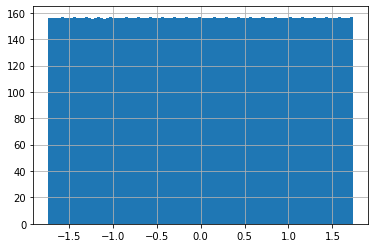

In [5]:
df_scores['popularity'].hist(bins=100)

<AxesSubplot:>

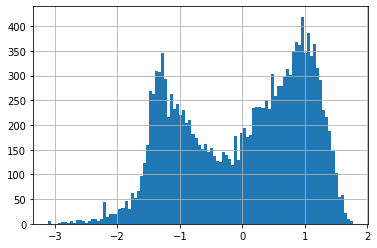

In [6]:
df_scores['content'].hist(bins=100)

<AxesSubplot:>

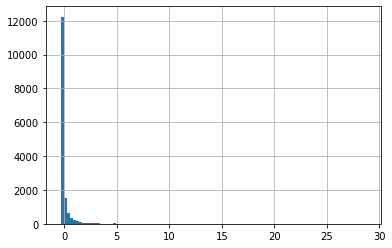

In [7]:
df_scores['users'].hist(bins=100)

In [8]:
(df_scores['users'] > .5).sum()

1326

In [ ]:
import pandas as pd

In [ ]:
coordinates = pd.read_csv('visualization/embeddings_2d.csv', index_col=0)
coordinates.head()

In [ ]:
coordinates.to_json(orient='records')

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from data import DF_NEWS_TRAIN

model = SentenceTransformer('sentence-transformers/stsb-distilbert-base')
encoder = LabelEncoder()

In [ ]:
cats = encoder.fit_transform(DF_NEWS_TRAIN['cat'])
subcats = encoder.fit_transform(DF_NEWS_TRAIN['subcat'])

In [ ]:
titles = DF_NEWS_TRAIN['title']
embeddings = model.encode(titles)

embeddings = pd.DataFrame(embeddings)
embeddings[768] = encoder.fit_transform(cats)
embeddings[769] = encoder.fit_transform(subcats)

embeddings.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_2d = pca.fit_transform(X_scaled)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.DataFrame(X_2d)
data.plot.scatter(0, 1, alpha=.01)

In [ ]:
from models.blackbox.recommender import *

In [ ]:
get_reco(['N8268'])

In [ ]:
DF_NEWS_TEST.head()

In [ ]:
DF_NEWS_TEST.loc['N13620']

In [ ]:
from data import DF_BHVR_TEST, DF_NEWS_TEST, DF_NEWS_TRAIN
from models.blackbox.utils import build, load

import numpy as np
import pandas as pd
import pickle

SEED = 42
np.seed = SEED

In [ ]:
model = build()
load(model)

In [ ]:
news_vecs = model.run_news("data/train/news.tsv")
user_vec = model.run_user("data/train/news.tsv", "user.tsv")[0]

In [ ]:
preds = np.dot(
    np.stack(news_vecs.values(), axis=0),
    user_vec,
)
pred_rank = np.argsort(np.argsort(preds)[::-1])
pred_rank

In [ ]:
top = 10
idx = np.argpartition(pred_rank, top)
recos = [ x for _, x in sorted(zip(pred_rank[idx[:top]], idx[:top])) ]
recos

In [ ]:
sorted(zip(pred_rank[idx[:top]], idx[:top]))

In [ ]:
recos = [str(r) for r in recos]
recos

In [ ]:
recos = ['N3112', 'N10399', 'N12103', 'N20460', 'N5409', 'N21078', 'N9552']
DF_NEWS_TEST.loc[recos]

In [ ]:
user = pd.read_csv('user.tsv', sep='\t', header=None)
user

In [ ]:
nid2index = {}
news_title = [""]

for nid, news in DF_NEWS_TRAIN.iterrows():
    if nid in nid2index:
        continue
    nid2index[nid] = len(nid2index) + 1
    news_title.append(news['title'])

In [ ]:
model_size = model.hparams.his_size

history = user.iloc[0, 3]
history = [ nid2index[nid] for nid in history.split() ]
history = [0] * (model_size - len(history)) + history[:model_size]
history

In [ ]:
with open(model.hparams.wordDict_file, "rb") as f:
    word_dict = pickle.load(f)

In [ ]:
model_title_size = model.hparams.title_size

news_title_index = np.zeros(
    ( len(news_title), model_title_size ), 
    dtype="int32"
)

for news_idx, title in enumerate(news_title):
    for word_idx in range(min(model_title_size, len(title))):
        word = title[word_idx]
        if word in word_dict:
            news_title_index[news_idx, word_idx] = word_dict[word.lower()]
            
news_title_index

In [ ]:
user_indexes = [0]
impr_indexes = [0]
click_title_indexes = [ news_title_index[history] ]

batch = {
    "user_index_batch": np.asarray(user_indexes, dtype=np.int32),
    "impr_index_batch": np.asarray(impr_indexes, dtype=np.int32),
    "clicked_title_batch": np.asarray(click_title_indexes, dtype=np.int64)
}
batch

In [ ]:
batch = model._get_user_feature_from_iter(batch)
user_vec = model.userencoder.predict_on_batch(batch)
user_vec

In [ ]:
df = pd.DataFrame({
    col: DF_BHVR_TEST[col].sample(n=1, random_state=SEED).values
    for col in DF_BHVR_TEST.columns
})
df['impressions'] = " ".join([ id_news + "-0" for id_news in DF_NEWS_TEST.sample(n=3).index ])
df['impressions'] = 'N9582-0 N16696-0 N22013-1'
df.to_csv("user.tsv", sep="\t", header=False)
df

In [ ]:
df.iloc[0]['history']

In [ ]:
df.iloc[0]['impressions']

In [ ]:
batch_data = model.test_iterator.load_data_from_file("data/test/news.tsv", "user.tsv")
batch_data = list(batch_data)
len(batch_data)

In [ ]:
for data in batch_data:
    feat, label = model._get_input_label_from_iter(data)
    pred = model.scorer.predict_on_batch(feat)
    print("feat")
    print(feat)
    print("label")
    print(label)
    print("pred")
    print(pred)
    print("===========================================")

In [ ]:
group_impr_indexes, group_labels, group_preds = model.run_slow_eval("data/test/news.tsv", "user.tsv")

In [ ]:
group_impr_indexes

In [ ]:
group_labels

In [ ]:
group_preds

In [ ]:
nid2index = {}

for news in file:
    nid
    if nid in self.nid2index:
        continue

    nid2index[nid] = len(nid2index) + 1

In [ ]:
labels = []
imprs_indexes = []
imprs = []

for i, user in enumerate(file):
    impr
    
    label = [int(i.split("-")[1]) for i in impr.split()]
    labels.append(label)
    
    impr_news = [self.nid2index[i.split("-")[0]] for i in impr.split()]
    imprs.append(impr_news)
    
    imprs_indexes.append(i)

In [ ]:
indexes = np.arange(len(labels))
for index in indexes:
    impr_news = np.array(imprs[index], dtype="int32")

    yield(
        impr_indexes[index],
        impr_news
    )

In [ ]:
group_preds = []
for ...:
    pred = np.dot(
        np.stack([news_vecs[i] for i in news_index], axis=0),
        user_vecs[impr_index],
    )
    group_preds.append(pred)

In [ ]:
for preds in tqdm(group_preds):
    pred_rank = (np.argsort(np.argsort(preds)[::-1]) + 1).tolist()
    pred_rank = '[' + ','.join([str(i) for i in pred_rank]) + ']'
    print(pred_rank)
    break

In [ ]:
nid2index = {}

for nid in DF_NEWS_TRAIN.index:
    if nid in nid2index:
        continue
    nid2index[nid] = len(nid2index) + 1

In [ ]:
user = pd.read_csv('user.tsv', sep='\t', header=None)
impressions = user.iloc[0, 4]
impressions

In [ ]:
news_index = [
    nid2index[impression.split("-")[0]] 
    for impression in impressions.split()
]
news_index = np.array(news_index, dtype="int32")